## 金融数据处理

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn
import tushare as ts
%matplotlib inline
import warnings; warnings.simplefilter('ignore') #忽略可能会出现的警告信息，警告并不是错误，可以忽略；

### 1. 获取金融数据

In [2]:
Mytoken=ts.set_token('315c111b7c5684e65563e52d902c29c130f96437e2726f6336780b71')
pro = ts.pro_api(Mytoken)

In [3]:
data = ts.pro_bar(ts_code='000001.SZ', adj='qfq', start_date='20180101', end_date='20200101')     #无法像yahoo一样同时调取多只股票；

In [4]:
data.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,000001.SZ,20191231,16.57,16.63,16.31,16.45,16.57,-0.12,-0.7242,704442.25,1154704.348
1,000001.SZ,20191230,16.46,16.63,16.10,16.57,16.63,-0.06,-0.3608,976970.31,1603152.786
2,000001.SZ,20191227,16.53,16.93,16.43,16.63,16.47,0.16,0.9715,1042574.72,1741473.179
3,000001.SZ,20191226,16.34,16.48,16.32,16.47,16.30,0.17,1.0429,372033.86,610381.757
4,000001.SZ,20191225,16.45,16.56,16.24,16.30,16.40,-0.10,-0.6098,414917.98,679664.596


In [5]:
#不轻易对源数据进行修改，我们进行copy
data_1=data.copy()

In [6]:
data_1.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,000001.SZ,20191231,16.57,16.63,16.31,16.45,16.57,-0.12,-0.7242,704442.25,1154704.348
1,000001.SZ,20191230,16.46,16.63,16.10,16.57,16.63,-0.06,-0.3608,976970.31,1603152.786
2,000001.SZ,20191227,16.53,16.93,16.43,16.63,16.47,0.16,0.9715,1042574.72,1741473.179
3,000001.SZ,20191226,16.34,16.48,16.32,16.47,16.30,0.17,1.0429,372033.86,610381.757
4,000001.SZ,20191225,16.45,16.56,16.24,16.30,16.40,-0.10,-0.6098,414917.98,679664.596


In [7]:
data_1=pd.DataFrame(data_1)

In [9]:
data_1.index   #可以看到index  是数字，没有意义

RangeIndex(start=0, stop=487, step=1)

In [10]:
data_1.info()   #从info()也可以看出来

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ts_code     487 non-null    object 
 1   trade_date  487 non-null    object 
 2   open        487 non-null    float64
 3   high        487 non-null    float64
 4   low         487 non-null    float64
 5   close       487 non-null    float64
 6   pre_close   487 non-null    float64
 7   change      487 non-null    float64
 8   pct_chg     487 non-null    float64
 9   vol         487 non-null    float64
 10  amount      487 non-null    float64
dtypes: float64(9), object(2)
memory usage: 38.1+ KB


In [11]:
data_1.set_index('trade_date',inplace=True)

In [12]:
data_1.index=pd.to_datetime(data_1.index)
data_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 487 entries, 2019-12-31 to 2018-01-02
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ts_code    487 non-null    object 
 1   open       487 non-null    float64
 2   high       487 non-null    float64
 3   low        487 non-null    float64
 4   close      487 non-null    float64
 5   pre_close  487 non-null    float64
 6   change     487 non-null    float64
 7   pct_chg    487 non-null    float64
 8   vol        487 non-null    float64
 9   amount     487 non-null    float64
dtypes: float64(9), object(1)
memory usage: 39.9+ KB


In [13]:
data_1.head()   #完成

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
2019-12-31,000001.SZ,16.57,16.63,16.31,16.45,16.57,-0.12,-0.7242,704442.25,1154704.348
2019-12-30,000001.SZ,16.46,16.63,16.10,16.57,16.63,-0.06,-0.3608,976970.31,1603152.786
2019-12-27,000001.SZ,16.53,16.93,16.43,16.63,16.47,0.16,0.9715,1042574.72,1741473.179
2019-12-26,000001.SZ,16.34,16.48,16.32,16.47,16.30,0.17,1.0429,372033.86,610381.757
2019-12-25,000001.SZ,16.45,16.56,16.24,16.30,16.40,-0.10,-0.6098,414917.98,679664.596


In [14]:
#改一下列名
data_1.rename(columns={'trade_date':'date','ts_code':'code'})     #需要加上inpalce

,code,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
2019-12-31,000001.SZ,16.5700,16.6300,16.3100,16.4500,16.5700,-0.1200,-0.7242,704442.25,1154704.348
2019-12-30,000001.SZ,16.4600,16.6300,16.1000,16.5700,16.6300,-0.0600,-0.3608,976970.31,1603152.786
2019-12-27,000001.SZ,16.5300,16.9300,16.4300,16.6300,16.4700,0.1600,0.9715,1042574.72,1741473.179
2019-12-26,000001.SZ,16.3400,16.4800,16.3200,16.4700,16.3000,0.1700,1.0429,372033.86,610381.757
2019-12-25,000001.SZ,16.4500,16.5600,16.2400,16.3000,16.4000,-0.1000,-0.6098,414917.98,679664.596
...,...,...,...,...,...,...,...,...,...,...
2018-01-08,000001.SZ,12.9029,12.9418,12.5231,12.6205,12.9516,-0.3311,-2.5564,2158620.81,2806099.169
2018-01-05,000001.SZ,12.8639,13.0003,12.8055,12.9516,12.9029,0.0487,0.3774,1210312.72,1603289.517
2018-01-04,000001.SZ,12.9710,13.0197,12.7860,12.9029,12.9808,-0.0779,-0.6001,1854509.48,2454543.516


In [15]:
del data_1['pct_chg']   #删除没有用的列

In [16]:
data_1.head()

,ts_code,open,high,low,close,pre_close,change,vol,amount
trade_date,,,,,,,,,
2019-12-31,000001.SZ,16.57,16.63,16.31,16.45,16.57,-0.12,704442.25,1154704.348
2019-12-30,000001.SZ,16.46,16.63,16.10,16.57,16.63,-0.06,976970.31,1603152.786
2019-12-27,000001.SZ,16.53,16.93,16.43,16.63,16.47,0.16,1042574.72,1741473.179
2019-12-26,000001.SZ,16.34,16.48,16.32,16.47,16.30,0.17,372033.86,610381.757
2019-12-25,000001.SZ,16.45,16.56,16.24,16.30,16.40,-0.10,414917.98,679664.596


In [20]:
#修改index的名字，记得inplace
data_1.index.set_names('date',inplace=True)  
data_1.head()

,ts_code,open,high,low,close,pre_close,change,vol,amount
date,,,,,,,,,
2019-12-31,000001.SZ,16.57,16.63,16.31,16.45,16.57,-0.12,704442.25,1154704.348
2019-12-30,000001.SZ,16.46,16.63,16.10,16.57,16.63,-0.06,976970.31,1603152.786
2019-12-27,000001.SZ,16.53,16.93,16.43,16.63,16.47,0.16,1042574.72,1741473.179
2019-12-26,000001.SZ,16.34,16.48,16.32,16.47,16.30,0.17,372033.86,610381.757
2019-12-25,000001.SZ,16.45,16.56,16.24,16.30,16.40,-0.10,414917.98,679664.596


In [26]:
type(data_1)

pandas.core.frame.DataFrame

In [29]:
#改一下列名，记得index
data_1=data_1.rename(columns={'ts_code':'code'})     #不需要需要加上inpalce
data_1.head()

,code,open,high,low,close,pre_close,change,vol,amount
date,,,,,,,,,
2019-12-31,000001.SZ,16.57,16.63,16.31,16.45,16.57,-0.12,704442.25,1154704.348
2019-12-30,000001.SZ,16.46,16.63,16.10,16.57,16.63,-0.06,976970.31,1603152.786
2019-12-27,000001.SZ,16.53,16.93,16.43,16.63,16.47,0.16,1042574.72,1741473.179
2019-12-26,000001.SZ,16.34,16.48,16.32,16.47,16.30,0.17,372033.86,610381.757
2019-12-25,000001.SZ,16.45,16.56,16.24,16.30,16.40,-0.10,414917.98,679664.596


In [67]:
#整理一下顺序和逻辑
data = ts.pro_bar('000008.SZ', adj='qfq', start_date='20180101', end_date='20200101')    
data.set_index('trade_date',inplace=True)
data.index=pd.to_datetime(data.index)
data=data.rename(index={'trade_date':'date'},columns={'ts_code':'code'})  #index名字修改没成功
data=data.drop(columns=['pct_chg', 'pre_close','change','amount'])    #删除列，用del 方法没有成功
data.index.set_names('date',inplace=True)   #重新修改index名字
data.head()

,code,open,high,low,close,vol
date,,,,,,
2019-12-31,000008.SZ,3.62,3.64,3.61,3.63,156918.49
2019-12-30,000008.SZ,3.62,3.64,3.57,3.61,247484.54
2019-12-27,000008.SZ,3.65,3.68,3.62,3.63,248982.17
2019-12-26,000008.SZ,3.63,3.64,3.60,3.63,177466.33
2019-12-25,000008.SZ,3.62,3.64,3.60,3.62,189553.42


###  2.同时获取多只股价信息

*基本思想其实和获取单只股票股价信息是一样的，这里先分布解释，再合成*

In [73]:
#第一步
def data(codes):
        stock= ts.pro_bar(codes, adj='qfq', start_date='20180101', end_date='20200101')    
        stock.set_index('trade_date',inplace=True)
        stock.index=pd.to_datetime(stock.index)
        stock=stock.rename(index={'trade_date':'date'},columns={'ts_code':'code'})  #index名字修改没成功
        stock=stock.drop(columns=['pct_chg', 'pre_close','change','amount'])    #删除列，用del 方法没有成功
        stock.index.set_names('date',inplace=True)   #重新修改index名字
        return stock

In [74]:
#第二步
codes=['000001.SZ', '000005.SZ','000008.SZ']
a=data(codes[1])
a.head()

,code,open,high,low,close,vol
date,,,,,,
2019-12-31,000005.SZ,3.09,3.10,3.05,3.09,55611.66
2019-12-30,000005.SZ,3.06,3.09,3.01,3.08,66811.55
2019-12-27,000005.SZ,3.10,3.14,3.08,3.09,91970.01
2019-12-26,000005.SZ,3.03,3.14,3.03,3.10,123479.27
2019-12-25,000005.SZ,3.05,3.05,3.01,3.03,47741.00


In [77]:
#第三步,利用python的内置函数map
datas=map(data,codes)
re=pd.concat(datas,keys=codes,names=['codes','data'])
re.head()

code   open   high    low  close         vol
codes     data                                                         
000001.SZ 2019-12-31  000001.SZ  16.57  16.63  16.31  16.45   704442.25
          2019-12-30  000001.SZ  16.46  16.63  16.10  16.57   976970.31
          2019-12-27  000001.SZ  16.53  16.93  16.43  16.63  1042574.72
          2019-12-26  000001.SZ  16.34  16.48  16.32  16.47   372033.86
          2019-12-25  000001.SZ  16.45  16.56  16.24  16.30   414917.98

In [82]:
def multiple_stocks(codes):
    def data(codes):
        stock= ts.pro_bar(codes, adj='qfq', start_date='20180101', end_date='20200101')    
        stock.set_index('trade_date',inplace=True)
        stock.index=pd.to_datetime(stock.index)
        stock=stock.rename(index={'trade_date':'date'},columns={'ts_code':'code'})  #index名字修改没成功
        stock=stock.drop(columns=['pct_chg', 'pre_close','change','amount'])    #删除列，用del 方法没有成功
        stock.index.set_names('date',inplace=True)   #重新修改index名字
        return stock
    datas=map(data,codes)
    return pd.concat(datas,keys=codes,names=['codes','date'])

In [83]:
#三步合成一步
codes=['000001.SZ', '000005.SZ','000008.SZ']
data_1=multiple_stocks(codes)
data_1.head()

code   open   high    low  close         vol
codes     date                                                         
000001.SZ 2019-12-31  000001.SZ  16.57  16.63  16.31  16.45   704442.25
          2019-12-30  000001.SZ  16.46  16.63  16.10  16.57   976970.31
          2019-12-27  000001.SZ  16.53  16.93  16.43  16.63  1042574.72
          2019-12-26  000001.SZ  16.34  16.48  16.32  16.47   372033.86
          2019-12-25  000001.SZ  16.45  16.56  16.24  16.30   414917.98

### 2. 金融数据可视化

In [84]:
close_price = data_1[['close']].reset_index()      #重置索引，让索引重新回到默认的0开始；
close_price.head()

,codes,date,close
0,000001.SZ,2019-12-31,16.45
1,000001.SZ,2019-12-30,16.57
2,000001.SZ,2019-12-27,16.63
3,000001.SZ,2019-12-26,16.47
4,000001.SZ,2019-12-25,16.30


In [86]:
# 把所有的股价信息显示在一张表格里；数据透视表；
daily_close = close_price.pivot(index = 'date', 
                                columns = 'codes', 
                                values= 'close')
daily_close.head()

codes,000001.SZ,000005.SZ,000008.SZ
date,,,
2018-01-02,13.3411,4.32,8.6597
2018-01-03,12.9808,4.27,8.6399
2018-01-04,12.9029,4.29,8.5708
2018-01-05,12.9516,4.34,8.4424
2018-01-08,12.6205,4.37,8.3634


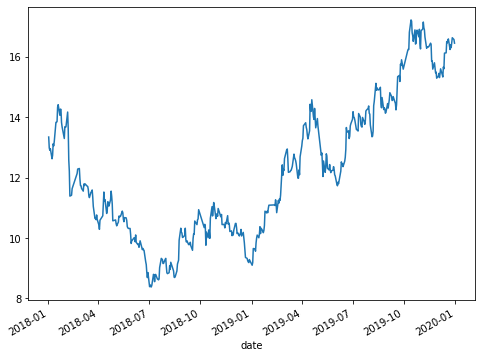

In [88]:
# plot 中信证券
daily_close['000001.SZ'].plot(figsize=(8,6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x113E7990>,
      dtype=object)

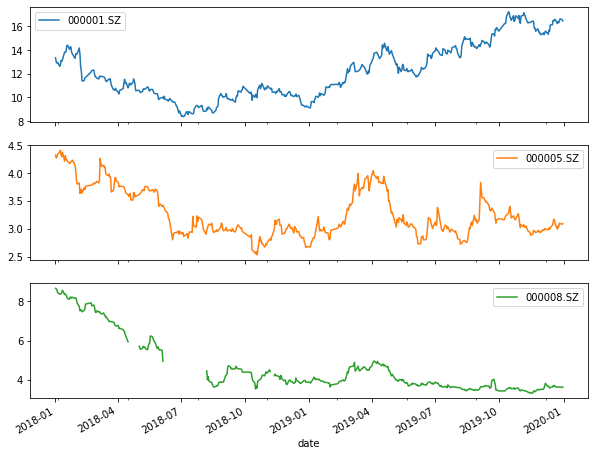

In [89]:
# plot 三只股票的股价信息
daily_close.plot(subplots= True, figsize=(10, 8))

### 3. 金融计算

#### 3.1 计算每日收益

In [92]:
# 用shift方法；
price_change = daily_close / daily_close.shift(1) - 1
daily_close['yes_day'] = daily_close['000001.SZ'].shift(1)
price_change.iloc[:,0:4].head()

codes,000001.SZ,000005.SZ,000008.SZ,yes_day
date,,,,
2018-01-02,NaN,NaN,NaN,NaN
2018-01-03,-0.027007,-0.011574,-0.002286,NaN
2018-01-04,-0.006001,0.004684,-0.007998,-0.027007
2018-01-05,0.003774,0.011655,-0.014981,-0.006001
2018-01-08,-0.025564,0.006912,-0.009358,0.003774


In [93]:
del daily_close['yes_day'] 

In [95]:
#  用.pct_change() 方法
price_change2 = daily_close.pct_change()
price_change2.iloc[:,0:2].head()

codes,000001.SZ,000005.SZ
date,,
2018-01-02,NaN,NaN
2018-01-03,-0.027007,-0.011574
2018-01-04,-0.006001,0.004684
2018-01-05,0.003774,0.011655
2018-01-08,-0.025564,0.006912


In [97]:
# 将NaN值替换为0
price_change2.fillna(0, inplace=True)
price_change2.iloc[:5,:]

codes,000001.SZ,000005.SZ,000008.SZ
date,,,
2018-01-02,0.000000,0.000000,0.000000
2018-01-03,-0.027007,-0.011574,-0.002286
2018-01-04,-0.006001,0.004684,-0.007998
2018-01-05,0.003774,0.011655,-0.014981
2018-01-08,-0.025564,0.006912,-0.009358


#### 3.2 计算累积收益

In [98]:
cum_daily_return = (1 + price_change2).cumprod()
cum_daily_return.head()

codes,000001.SZ,000005.SZ,000008.SZ
date,,,
2018-01-02,1.000000,1.000000,1.000000
2018-01-03,0.972993,0.988426,0.997714
2018-01-04,0.967154,0.993056,0.989734
2018-01-05,0.970805,1.004630,0.974907
2018-01-08,0.945986,1.011574,0.965784


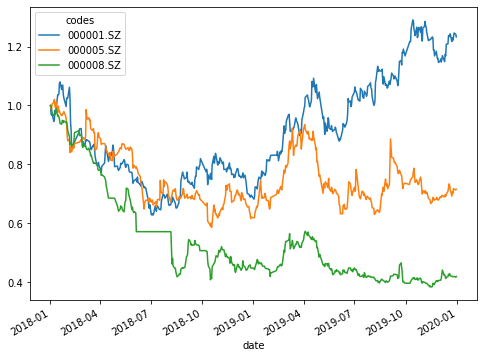

In [100]:
import seaborn as sns
cum_daily_return.plot(figsize=(8,6))

### 4. 分析return分布

#### 4.1 直方图

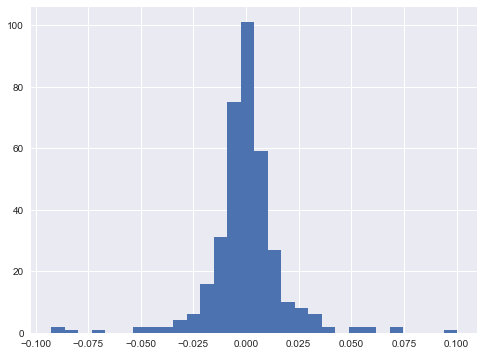

In [25]:
# 绘制频数分布直方图，分析中信证券的return分布；
zxzq = price_change['600030']
zxzq.hist(bins=30, figsize=(8,6));

In [27]:
zxzq.describe(percentiles=[0.025, 0.5, 0.975])

count    362.000000
mean       0.000169
std        0.018050
min       -0.092490
2.5%      -0.035270
50%        0.000000
97.5%      0.032897
max        0.100316
Name: 600030, dtype: float64

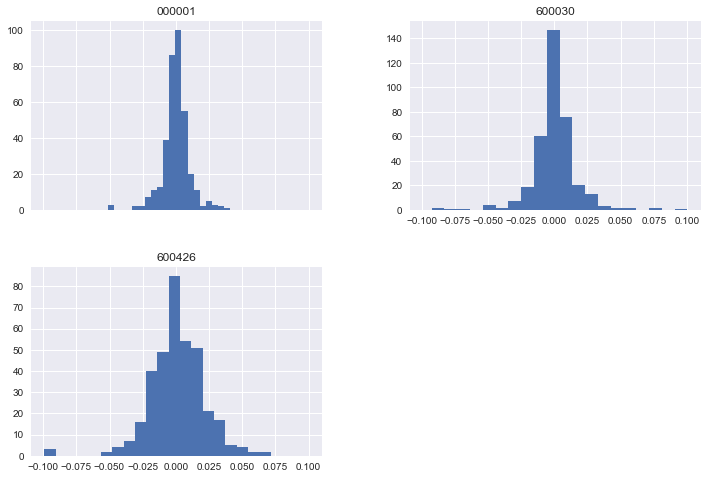

In [30]:
# 画出所有股票的股价分布：
_ = price_change.hist(bins=20, sharex=True, figsize=(12,8));

#### 4.2 QQ-Plots

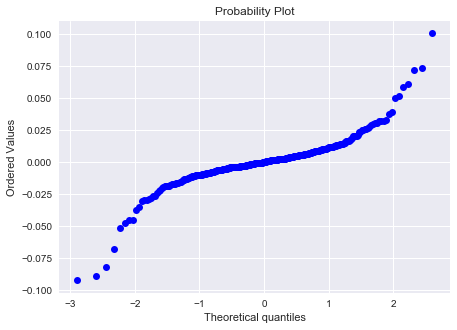

In [31]:
# 使用QQ图来验证股价retun分布；
import scipy.stats as stats
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
stats.probplot(zxzq, dist='norm', plot=ax)   #stats.probplot()用来绘制QQ图；
plt.show()

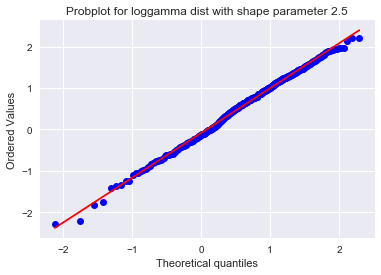

In [32]:
>>> fig = plt.figure()
>>> ax = fig.add_subplot(111)
>>> x = stats.loggamma.rvs(c=2.5, size=500)
>>> stats.probplot(x, dist=stats.loggamma, sparams=(2.5,), plot=ax)
>>> ax.set_title("Probplot for loggamma dist with shape parameter 2.5")
>>> plt.show()

### 5. 股价相关性

In [33]:
# 计算沪深300指数收益
hs300_return = hs300['close'].pct_change().fillna(0)
hs300_return.head()

date
2016-01-04    0.000000
2016-01-05    0.002412
2016-01-06    0.017544
2016-01-07   -0.069334
2016-01-08    0.020392
Name: close, dtype: float64

In [34]:
price_change2.head()

Ticker,000001,600030,600426
Date,,,
2016-01-04,0.000000,0.000000,0.000000
2016-01-05,0.008861,0.009679,0.004622
2016-01-06,0.011386,0.015898,0.032996
2016-01-07,-0.051142,-0.088677,-0.096462
2016-01-08,0.016384,0.029970,0.028732


In [36]:
# 把沪深300的收益拼接到前面得到的大表中
return_all = pd.concat([hs300_return, price_change2], axis=1)
return_all.rename(columns={'close': 'hs300'}, inplace=True)
return_all.head()

,hs300,000001,600030,600426
2016-01-04,0.000000,0.000000,0.000000,0.000000
2016-01-05,0.002412,0.008861,0.009679,0.004622
2016-01-06,0.017544,0.011386,0.015898,0.032996
2016-01-07,-0.069334,-0.051142,-0.088677,-0.096462
2016-01-08,0.020392,0.016384,0.029970,0.028732


In [37]:
# 计算累积收益
cumreturn_all = (1 + return_all).cumprod()
cumreturn_all.head()

,hs300,000001,600030,600426
2016-01-04,1.000000,1.000000,1.000000,1.000000
2016-01-05,1.002412,1.008861,1.009679,1.004622
2016-01-06,1.019998,1.020348,1.025730,1.037771
2016-01-07,0.949277,0.968165,0.934772,0.937665
2016-01-08,0.968635,0.984028,0.962787,0.964606


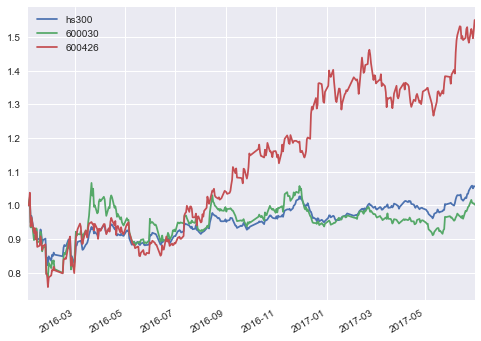

In [38]:
# 累积收益作图
cumreturn_all[['hs300', '600030', '600426']].plot(figsize=(8,6));

In [39]:
# 计算相关性
corrs = return_all.corr()
corrs

,hs300,000001,600030,600426
hs300,1.000000,0.863691,0.879145,0.729017
000001,0.863691,1.000000,0.780365,0.611967
600030,0.879145,0.780365,1.000000,0.619960
600426,0.729017,0.611967,0.619960,1.000000


In [42]:
corrs.ix['hs300']

hs300     1.000000
000001    0.863691
600030    0.879145
600426    0.729017
Name: hs300, dtype: float64

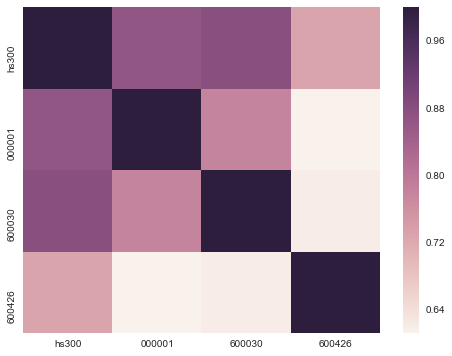

In [45]:
import seaborn
fig = plt.figure(figsize=(8,6))
seaborn.heatmap(corrs)

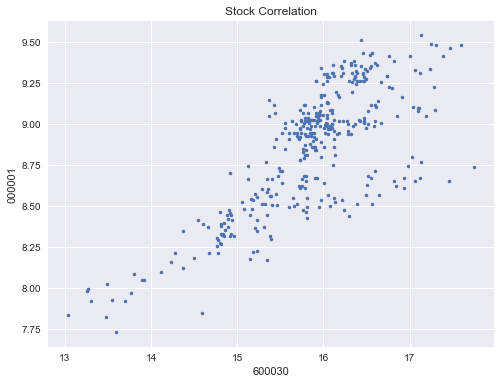

In [49]:
plt.figure(figsize =(8,6))
plt.title('Stock Correlation')
plt.plot(daily_close['600030'], daily_close['000001'], '.')
plt.xlabel('600030')
plt.ylabel('000001')

声明：本资料仅供内部学习交流使用，切勿外传。